In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

#### Importing data set for a csv data file, this file was downloaded from kaggle's data set library.

In [2]:
data = pd.read_csv("//home//abhishek//Programs_practice//Machine_Learning//Machine_Learning_Workspace//Regression/FuelConsumption.csv",encoding="ISO-8859-1")

In [3]:
data.head(10)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,Unnamed: 11,CO2EMISSIONS
0,YEAR,NaN,# = high output engine,NaN,(L),NaN,NaN,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
1,2012,ACURA,MDX AWD,SUV,3.7,6.0,AS6,Z,14.8,11.3,13.2,21,304
2,2012,ACURA,RDX AWD TURBO,SUV,2.3,4.0,AS5,Z,13.2,10.3,11.9,24,274
3,2012,ACURA,RL AWD,MID-SIZE,3.7,6.0,AS6,Z,13.7,9.7,11.9,24,274
4,2012,ACURA,TL,MID-SIZE,3.5,6.0,AS6,Z,11.8,8.1,10.1,28,232
5,2012,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,Z,12.9,9,11.1,25,255
6,2012,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,Z,13.4,9.5,11.6,24,267
7,2012,ACURA,TSX,COMPACT,2.4,4.0,AS5,Z,10.6,7.4,9.2,31,212
8,2012,ACURA,TSX,COMPACT,2.4,4.0,M6,Z,11.3,8.1,9.9,29,228
9,2012,ACURA,TSX,COMPACT,3.5,6.0,AS5,Z,12.1,8.3,10.4,27,239


In [4]:
print(data.shape)
print(" ")
print(data.columns)

(1118, 13)
 
Index(['MODEL', 'MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
       'FUELCONSUMPTION_COMB', 'Unnamed: 11', 'CO2EMISSIONS'],
      dtype='object')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 13 columns):
MODEL                   1102 non-null object
MAKE                    1111 non-null object
MODEL.1                 1093 non-null object
VEHICLE CLASS           1092 non-null object
ENGINESIZE              1093 non-null object
CYLINDERS               1092 non-null float64
TRANSMISSION            1092 non-null object
FUEL                    1093 non-null object
FUELCONSUMPTION_CITY    1093 non-null object
FUELCONSUMPTION_HWY     1093 non-null object
FUELCONSUMPTION_COMB    1093 non-null object
Unnamed: 11             1093 non-null object
CO2EMISSIONS            1093 non-null object
dtypes: float64(1), object(12)
memory usage: 113.7+ KB


In [6]:
df1 = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,CO2EMISSIONS
0,(L),NaN,CITY (L/100 km),COMB (L/100 km),HWY (L/100 km),(g/km)
1,3.7,6.0,14.8,13.2,11.3,304
2,2.3,4.0,13.2,11.9,10.3,274
3,3.7,6.0,13.7,11.9,9.7,274
4,3.5,6.0,11.8,10.1,8.1,232


In [7]:
print(df1.info())
print("\n")
df1 = df1.dropna()
print(df1.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 6 columns):
ENGINESIZE              1093 non-null object
CYLINDERS               1092 non-null float64
FUELCONSUMPTION_CITY    1093 non-null object
FUELCONSUMPTION_COMB    1093 non-null object
FUELCONSUMPTION_HWY     1093 non-null object
CO2EMISSIONS            1093 non-null object
dtypes: float64(1), object(5)
memory usage: 52.5+ KB
None


ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_COMB    0
FUELCONSUMPTION_HWY     0
CO2EMISSIONS            0
dtype: int64


### Now since few of the features are of data type object thus, first we are going to convert them to float datatype

In [8]:
convert_dict = {'ENGINESIZE':float, 'CYLINDERS':float, 'FUELCONSUMPTION_CITY':float, 'FUELCONSUMPTION_HWY':float,'CO2EMISSIONS':float,'FUELCONSUMPTION_COMB':float}
df = df1.astype(convert_dict)
print(df.dtypes)

ENGINESIZE              float64
CYLINDERS               float64
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_COMB    float64
FUELCONSUMPTION_HWY     float64
CO2EMISSIONS            float64
dtype: object


In [9]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,CO2EMISSIONS
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,3.559524,6.030220,14.053388,12.238278,10.022985,269.530220
std,1.387680,1.903252,4.250385,3.599725,2.861341,64.758906
min,1.000000,3.000000,4.500000,4.700000,4.900000,108.000000
25%,2.400000,4.000000,11.300000,9.900000,8.100000,225.000000
50%,3.500000,6.000000,13.200000,11.400000,9.400000,260.000000
75%,4.700000,8.000000,16.100000,13.900000,11.300000,306.000000
max,8.000000,16.000000,30.400000,26.000000,20.600000,547.000000


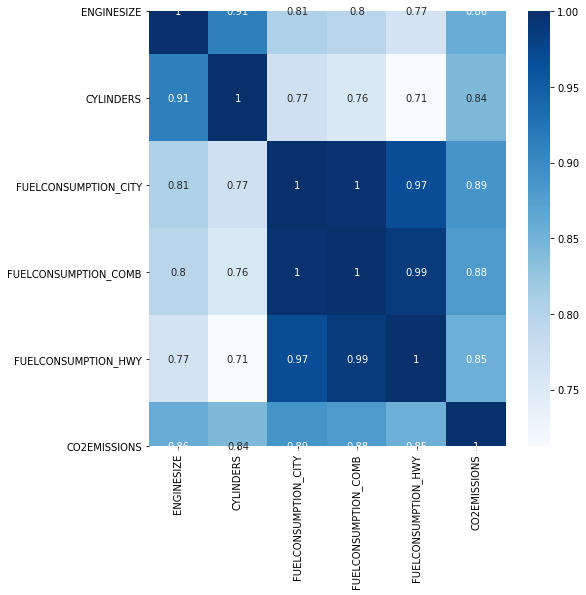

In [10]:
fig, ax = plt.subplots(figsize=(8,8)) # Figure resize, size scalled in inches
sns.heatmap(df.corr(),cmap='Blues',annot=True)

## Linear Regression
First we imply linear regression to predict the value of Carbondioxide *(CO2)* emission using independent feature EngineSize.
Here 'x' is the independent feature and 'y' is the dependent feature (CO2Emission) that we wish to predict based on the independent feature (Enginesize)

In [18]:
X = np.asanyarray(df['ENGINESIZE']).reshape(-1,1)
y = np.asanyarray(df['CO2EMISSIONS'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Split the data set into train and test set which are used to first train the model (i.e. fit) then make appropriate prediction and compare the results using the test set.

In [20]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

In [21]:
LR = LinearRegression()
model = LR.fit(train_x,train_y)

Our hypothesis function, which in simple linear regression would be the equation of straight line :
<br/>$ h_{\theta} = \theta_{0} + \theta_{1} x^{i}$
<br/>$\theta_{0}$ is intercept
<br/>$\theta_{1}$ is the coeficient (i.e. slope)

In [22]:
model.coef_

array([39.45206772])

In [23]:
model.intercept_

128.82588897717912

In [31]:
y_pred = LR.predict(test_x)
y_pred[0:10]

array([326.08622756, 207.73002441, 191.94919732, 191.94919732,
       326.08622756, 318.19581401, 247.18209212, 227.45605827,
       286.63415984, 337.92184787])

In [41]:
error = abs(y_pred - test_y)
error.sum()/y_pred.size

24.49500831121279

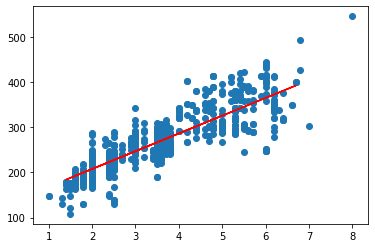

In [43]:
plt.scatter(train_x,train_y)
plt.plot(test_x,y_pred,color='Red')

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [48]:
error_mae = mean_absolute_error(test_y,y_pred)
error_mse = mean_squared_error(test_y,y_pred)
print(error_mae)

24.49500831121279


In [49]:
r2Error = r2_score(test_y,y_pred)
r2Error

0.7524993997985526

In [51]:
LR.score(train_x, train_y)

0.7336951382398076